# <span style = "color:coral;font-size:50px"> Face Mask Detection </span>

***

### Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
import glob

### Read all filenames in 'Face Mask/0' and 'Face Mask/1' folder and store it in variables named 'nomask' and 'mask' respectively

In [2]:
nomask = glob.glob('Face Mask/0/*.jpg')
mask = glob.glob('Face Mask/1/*.jpg')

### Check the number of images present in Both folders

In [26]:
print(f"No of No mask images found are {len(nomask)}")

No of No mask images found are 686


In [27]:
print(f"No of mask images found are {len(mask)}")

No of mask images found are 690


### Read all images in both mask and nomask and store it as as an array in a List named 'image' and also add label of 0 for nomask and 1 for mask in a list named 'label'

In [5]:
image = []
label = []

for i in nomask:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in mask:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

### Shuffle both image and label list

In [6]:
image, label = shuffle(image, label, random_state = 100)

### Plot some of the images

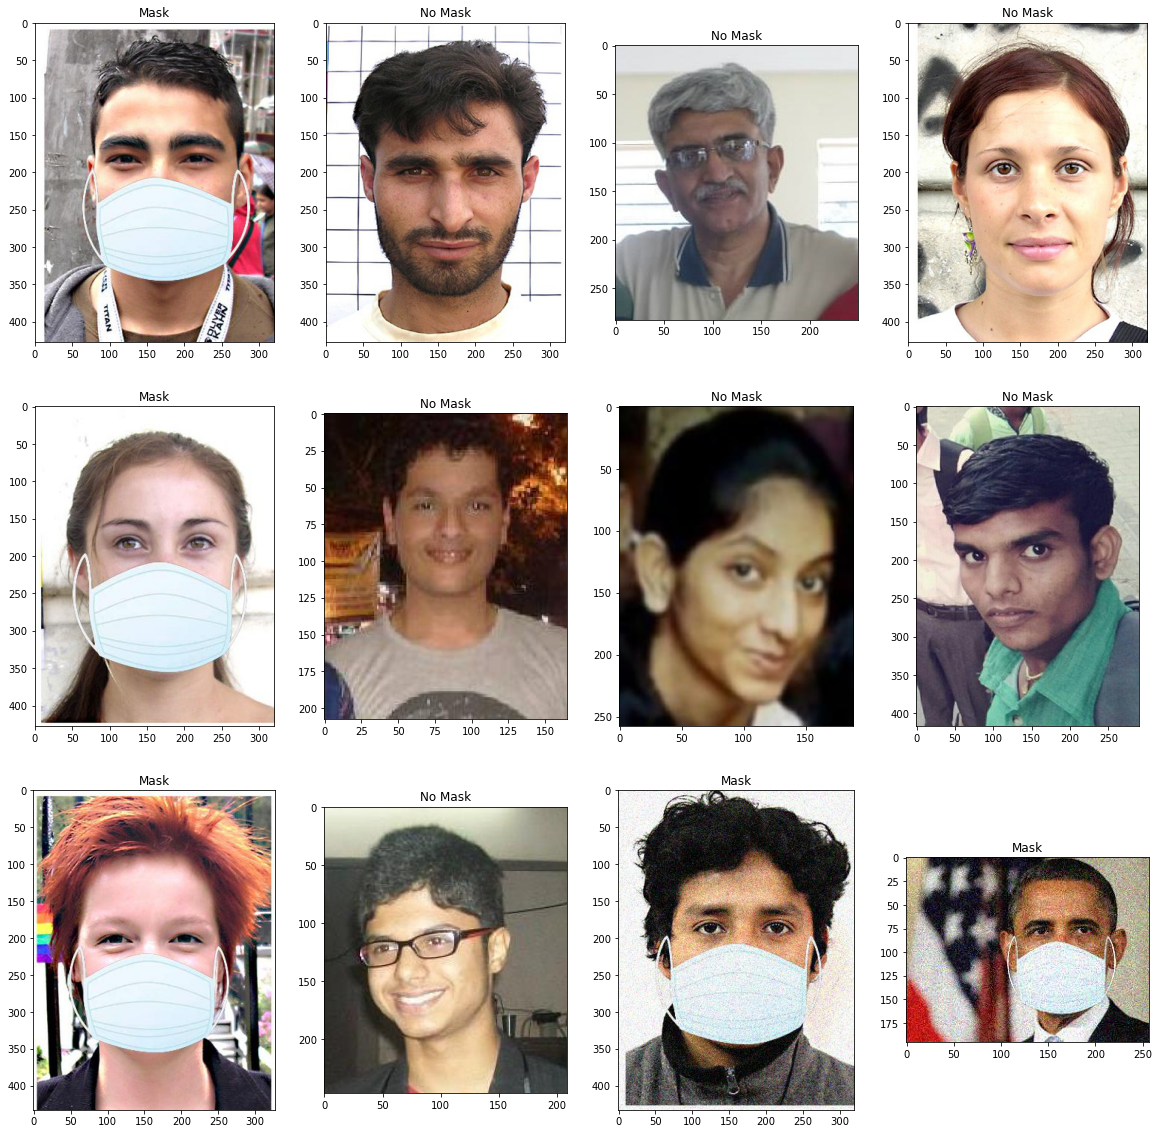

In [7]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 0:
        plt.title('No Mask')
    else:
        plt.title('Mask')

### Check the shape of some of the images

In [8]:
for i in range(10):
    print(image[i].shape)

(428, 320, 3)
(428, 320, 3)
(283, 250, 3)
(428, 320, 3)
(428, 320, 3)
(208, 165, 3)
(258, 189, 3)
(417, 290, 3)
(433, 327, 3)
(247, 209, 3)


### Resize the images to (224,224,3) and Store it in a Variable called 'X'

In [28]:
X =  []

for i in image:
    X.append(resize(i, (224,224,3)))

### Convert X to a numpy array. Also convert label to a numpy array and store it in a variable called 'y'

In [29]:
X = np.array(X)
y = np.array(label)

### Plot some of the images now that we have resized all the images

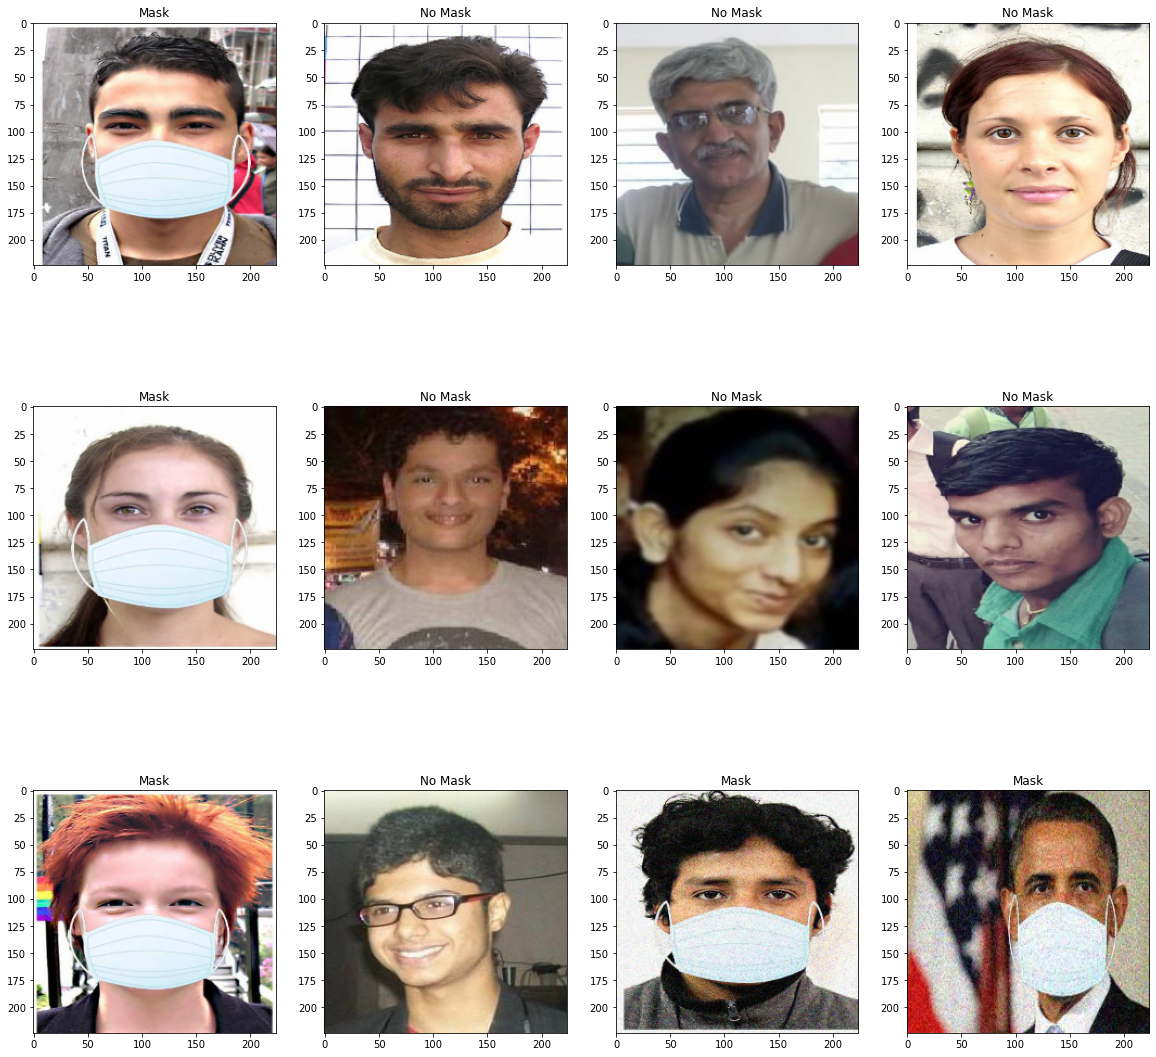

In [11]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    if label[i] == 0:
        plt.title('No Mask')
    else:
        plt.title('Mask')

### Check the shape of X

In [30]:
X.shape

(1376, 224, 224, 3)

### Split the dataset into Training and Testing Set

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2)

### Create a Keras Sequential Model with the following Layers

* 3 Convolutional Layers
* 3 Max pooling layers
* 1 Hidden Layer
* 1 Dropout Layer

In [40]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224,3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

### Compile the model

In [41]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Check the summary of our model

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 32)      

### Train the model

In [43]:
model.fit(X_train , y_train, epochs = 20, batch_size = 10, validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 21s 232ms/step - loss: 0.3391 - accuracy: 0.8489 - val_loss: 0.1198 - val_accuracy: 0.9500
Epoch 2/20
88/88 [==============================] - 20s 226ms/step - loss: 0.0948 - accuracy: 0.9659 - val_loss: 0.0936 - val_accuracy: 0.9591
Epoch 3/20
88/88 [==============================] - 20s 228ms/step - loss: 0.0690 - accuracy: 0.9773 - val_loss: 0.1938 - val_accuracy: 0.9273
Epoch 4/20
88/88 [==============================] - 20s 231ms/step - loss: 0.0333 - accuracy: 0.9864 - val_loss: 0.0458 - val_accuracy: 0.9727
Epoch 5/20
88/88 [==============================] - 20s 228ms/step - loss: 0.0199 - accuracy: 0.9920 - val_loss: 0.0680 - val_accuracy: 0.9773
Epoch 6/20
88/88 [==============================] - 20s 229ms/step - loss: 0.0298 - accuracy: 0.9920 - val_loss: 0.0370 - val_accuracy: 0.9909
Epoch 7/20
88/88 [==============================] - 20s 227ms/step - loss: 0.0184 - accuracy: 0.9932 - val_loss: 0.0468 - val_accuracy: 0.9909

### Evaluate the model

In [19]:
model.evaluate(X_train, y_train)

33/33 [==============================] - 5s 140ms/step - loss: 0.0104 - accuracy: 0.9971


[0.010350900702178478, 0.9970930218696594]

### Make predicitons with X_test

In [20]:
prediction = model.predict(X_test)

### View some of the predicted values

In [21]:
prediction[:5]

array([[9.9999893e-01, 2.1009207e-02, 8.3664192e-05, 5.0337465e-05],
       [9.1257668e-01, 9.9994624e-01, 1.7076731e-04, 1.4892220e-04],
       [9.9765742e-01, 6.2052250e-01, 3.4162998e-03, 9.9413097e-03],
       [9.9933904e-01, 5.3822118e-01, 2.5133193e-03, 1.7900765e-03],
       [9.7921324e-01, 4.8388702e-01, 2.5859982e-02, 3.2420844e-02]],
      dtype=float32)

### Convert these values to 0,1 with the help of list comphrehension and np.argmax() function

In [22]:
y_pred = [np.argmax(i) for i in prediction]

### Plot some of the images in X_test with the values we predicted as its Title
* Use 'No mask Detected' for 0
* 'Mask Detected' for 1

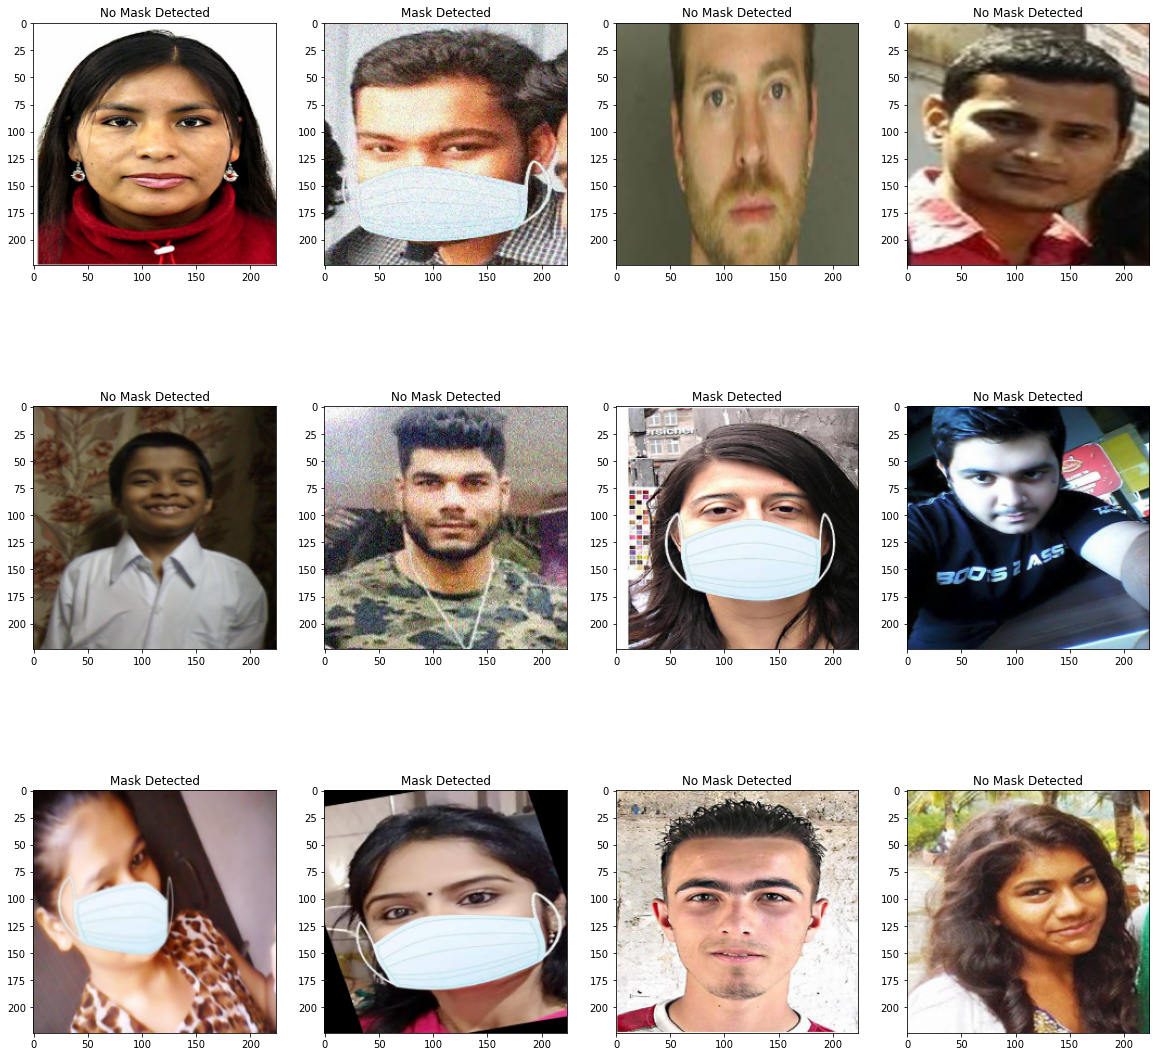

In [24]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if y_pred[i] == 0:
        plt.title('No Mask Detected')
    else: 
        plt.title('Mask Detected')